# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("nba_rookie_data_-2117739787.csv")

In [4]:
df.shape

(1340, 21)

In [5]:
df.head()

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [6]:
df.tail()

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1
1339,Jon Barry,47,11.7,4.4,1.6,4.4,36.9,0.4,1.3,33.3,...,1.0,67.3,0.2,0.7,0.9,1.4,0.7,0.1,0.9,1


In [7]:
df.columns

Index(['Name', 'Games Played', 'Minutes Played', 'Points Per Game',
       'Field Goals Made', 'Field Goal Attempts', 'Field Goal Percent',
       '3 Point Made', '3 Point Attempt', '3 Point Percent', 'Free Throw Made',
       'Free Throw Attempts', 'Free Throw Percent', 'Offensive Rebounds',
       'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'TARGET_5Yrs'],
      dtype='object')

In [8]:
df.isna().sum()

Name                    0
Games Played            0
Minutes Played          0
Points Per Game         0
Field Goals Made        0
Field Goal Attempts     0
Field Goal Percent      0
3 Point Made            0
3 Point Attempt         0
3 Point Percent        11
Free Throw Made         0
Free Throw Attempts     0
Free Throw Percent      0
Offensive Rebounds      0
Defensive Rebounds      0
Rebounds                0
Assists                 0
Steals                  0
Blocks                  0
Turnovers               0
TARGET_5Yrs             0
dtype: int64

In [9]:
df.duplicated().sum()

12

In [10]:
#Drop the null values

df.dropna(inplace=True)

In [11]:
#Remove the duplicates

df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1318 non-null   object 
 1   Games Played         1318 non-null   int64  
 2   Minutes Played       1318 non-null   float64
 3   Points Per Game      1318 non-null   float64
 4   Field Goals Made     1318 non-null   float64
 5   Field Goal Attempts  1318 non-null   float64
 6   Field Goal Percent   1318 non-null   float64
 7   3 Point Made         1318 non-null   float64
 8   3 Point Attempt      1318 non-null   float64
 9   3 Point Percent      1318 non-null   float64
 10  Free Throw Made      1318 non-null   float64
 11  Free Throw Attempts  1318 non-null   float64
 12  Free Throw Percent   1318 non-null   float64
 13  Offensive Rebounds   1318 non-null   float64
 14  Defensive Rebounds   1318 non-null   float64
 15  Rebounds             1318 non-null   f

In [13]:
df.describe()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000
mean,60.402124,17.654249,6.821017,2.635357,5.900910,44.138998,0.249621,0.784598,19.322989,1.302731,1.827162,70.412822,1.008194,2.023596,3.030956,1.558801,0.620637,0.366161,1.195827,0.621396
std,17.457767,8.340224,4.368868,1.687763,3.600133,6.116819,0.385397,1.065365,16.045404,0.989255,1.325931,10.494442,0.779410,1.364257,2.064212,1.478618,0.411766,0.429008,0.725690,0.485223
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.825000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.800000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,44.000000,0.100000,0.300000,22.450000,1.000000,1.500000,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.975000,8.800000,3.400000,7.500000,47.800000,0.400000,1.200000,32.575000,1.700000,2.300000,77.600000,1.400000,2.600000,3.975000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [14]:
df.corr()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
Games Played,1.000000,0.593356,0.541334,0.545647,0.521358,0.293458,0.111331,0.103249,0.041476,0.483782,0.481036,0.193759,0.401362,0.467714,0.461048,0.374063,0.454288,0.278236,0.520439,0.403781
Minutes Played,0.593356,1.000000,0.911624,0.902738,0.910329,0.207097,0.391862,0.405573,0.168600,0.791200,0.779971,0.236707,0.571772,0.746550,0.709949,0.630508,0.756955,0.398896,0.826235,0.318435
Points Per Game,0.541334,0.911624,1.000000,0.990867,0.980041,0.259893,0.348517,0.358777,0.154641,0.896424,0.881036,0.254899,0.573848,0.695453,0.677414,0.553357,0.674935,0.387611,0.850256,0.315697
Field Goals Made,0.545647,0.902738,0.990867,1.000000,0.980315,0.295872,0.290943,0.301147,0.122794,0.848348,0.840949,0.219750,0.594985,0.704316,0.691271,0.534055,0.662483,0.398186,0.834340,0.317226
Field Goal Attempts,0.521358,0.910329,0.980041,0.980315,1.000000,0.135322,0.391395,0.414618,0.199887,0.827497,0.806829,0.265184,0.503012,0.642465,0.615463,0.591089,0.690166,0.323084,0.846062,0.291205
Field Goal Percent,0.293458,0.207097,0.259893,0.295872,0.135322,1.000000,-0.289375,-0.345068,-0.328295,0.249928,0.303066,-0.153853,0.511662,0.409057,0.464560,-0.104841,0.059482,0.390073,0.124861,0.237833
3 Point Made,0.111331,0.391862,0.348517,0.290943,0.391395,-0.289375,1.000000,0.982640,0.588538,0.159747,0.097019,0.314893,-0.217329,0.020387,-0.069297,0.375183,0.306702,-0.154842,0.257924,0.036384
3 Point Attempt,0.103249,0.405573,0.358777,0.301147,0.414618,-0.345068,0.982640,1.000000,0.580918,0.175176,0.110445,0.323614,-0.230110,0.015803,-0.077197,0.409049,0.338800,-0.168020,0.283445,0.017500
3 Point Percent,0.041476,0.168600,0.154641,0.122794,0.199887,-0.328295,0.588538,0.580918,1.000000,0.035144,-0.027449,0.328961,-0.287360,-0.120756,-0.189001,0.263488,0.196523,-0.240578,0.110138,-0.003065
Free Throw Made,0.483782,0.791200,0.896424,0.848348,0.827497,0.249928,0.159747,0.175176,0.035144,1.000000,0.980535,0.253283,0.584242,0.656246,0.655569,0.476469,0.599654,0.408944,0.805715,0.297329


In [15]:
df.sample(10)

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
460,Jeff Taylor,44,17.6,3.6,1.5,3.6,40.0,0.0,0.0,0.0,...,1.0,65.2,0.6,1.2,1.8,2.5,0.9,0.3,1.4,0
957,Drew Gooden,70,26.8,12.5,5.1,11.1,45.7,0.2,0.7,29.2,...,3.0,71.2,2.3,4.2,6.5,1.2,0.8,0.5,2.1,1
904,Nick Collison,82,17.0,5.6,2.3,4.3,53.7,0.0,0.0,0.0,...,1.4,70.3,1.9,2.7,4.6,0.4,0.4,0.6,0.8,1
1170,Travis Knight,71,16.3,4.8,2.0,3.9,50.9,0.0,0.0,0.0,...,1.4,62.0,1.8,2.7,4.5,0.5,0.4,0.8,0.7,1
64,Gary Harris,55,13.1,3.4,1.2,3.9,30.4,0.4,1.9,20.4,...,0.9,74.5,0.4,0.8,1.2,0.5,0.7,0.1,0.7,0
585,Damian Lillard,82,38.6,19.0,6.7,15.7,42.9,2.3,6.1,36.8,...,3.9,84.4,0.5,2.6,3.1,6.5,0.9,0.2,3.0,1
525,Charlie Davis,54,10.6,3.8,1.6,3.4,47.8,0.0,0.0,0.0,...,0.7,81.1,1.0,1.5,2.5,0.6,0.2,0.2,0.8,0
1231,Juwan Howard,65,36.1,17.0,7.0,14.3,48.9,0.0,0.1,0.0,...,4.5,66.4,2.8,5.6,8.4,2.5,0.8,0.2,2.5,1
98,Kyle Anderson,33,10.8,2.2,0.9,2.7,34.8,0.1,0.3,27.3,...,0.4,64.3,0.2,2.0,2.2,0.8,0.5,0.2,0.3,0
1316,Sean Rooks,72,29.0,13.5,5.1,10.4,49.3,0.0,0.0,0.0,...,5.4,60.2,2.7,4.7,7.4,1.3,0.5,1.1,2.2,1


# Machine Learning

In [16]:
X = df.iloc[:,1:-1]
y=df.iloc[:,-1]
X

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8


In [17]:
y

0       0
1       0
2       0
3       1
4       1
       ..
1334    0
1336    1
1337    0
1338    1
1339    1
Name: TARGET_5Yrs, Length: 1318, dtype: int64

In [18]:
features = list(X.columns)

In [19]:
features

['Games Played',
 'Minutes Played',
 'Points Per Game',
 'Field Goals Made',
 'Field Goal Attempts',
 'Field Goal Percent',
 '3 Point Made',
 '3 Point Attempt',
 '3 Point Percent',
 'Free Throw Made',
 'Free Throw Attempts',
 'Free Throw Percent',
 'Offensive Rebounds',
 'Defensive Rebounds',
 'Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers']

In [20]:
models = [LogisticRegression(), GaussianNB(),MLPClassifier()]
accuracy_scores1 = []
mis_clas1 = []

In [21]:
X=df[features]
y=df.iloc[:,-1]

#Splitting the dataset into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [22]:
#Create an instance
for model in models:

    #Fit the model
    model.fit(X_train,y_train)

    #make prediction on test data
    y_pred = model.predict(X_test)

    score=round(model.score(X_test,y_test),3)
    mis_cla=(X_test.shape[0],(y_test!=model.predict(X_test)).sum())[1]
    
    accuracy_scores1.append(score)
    mis_clas1.append(mis_cla)
    print(f"{model} Effectiveness")
    print(score)
    print(mis_cla)
    print()

LogisticRegression() Effectiveness
0.701
79

GaussianNB() Effectiveness
0.636
96

MLPClassifier() Effectiveness
0.674
86



In [23]:
accuracy_scores2 = []
mis_clas2 = []

In [24]:
features = ["Games Played","Minutes Played","Points Per Game","Rebounds","Assists"]
X=df[features]
y=df.iloc[:,-1]

#Splitting the dataset into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [25]:
models = [LogisticRegression(), GaussianNB(),MLPClassifier()]

#Create an instance
for model in models:

    #Fit the model
    model.fit(X_train,y_train)

    #make prediction on test data
    y_pred = model.predict(X_test)

    score = round(model.score(X_test,y_test),3)
    mis_cla = (X_test.shape[0],(y_test!=model.predict(X_test)).sum())[1]
    
    accuracy_scores2.append(score)
    mis_clas2.append(mis_cla)
    print(f"{model} Effectiveness")
    print(score)
    print(mis_cla)
    print()

LogisticRegression() Effectiveness
0.689
82

GaussianNB() Effectiveness
0.659
90

MLPClassifier() Effectiveness
0.693
81



In [26]:
models = {
    "acc_score":accuracy_scores1 + accuracy_scores2,
    "models":["log",'gnb','mlp',"log",'gnb','mlp'],
    "acc":["acc1","acc1","acc1","acc2","acc2","acc2"],
    "mis_cla": mis_clas1 + mis_clas2,
    "mcla": ["mcla1","mcla1","mcla1","mcla2","mcla2","mcla2"]
}

In [27]:
mydata = pd.DataFrame(models)
mydata

,acc_score,models,acc,mis_cla,mcla
0,0.701,log,acc1,79,mcla1
1,0.636,gnb,acc1,96,mcla1
2,0.674,mlp,acc1,86,mcla1
3,0.689,log,acc2,82,mcla2
4,0.659,gnb,acc2,90,mcla2
5,0.693,mlp,acc2,81,mcla2


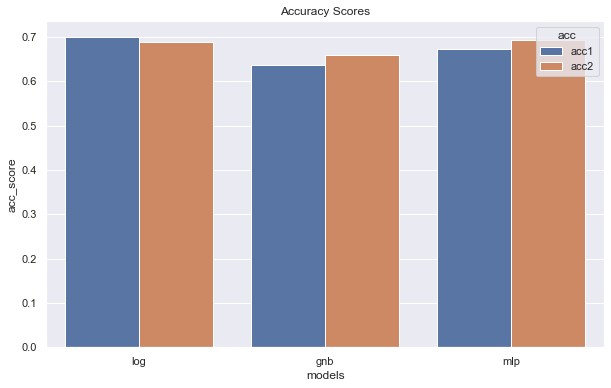

In [28]:
sns.set()
plt.figure(figsize=(10,6))
sns.barplot("models" , "acc_score",hue="acc",data=mydata)
plt.title("Accuracy Scores")
plt.savefig("acc_score.png")
plt.show()

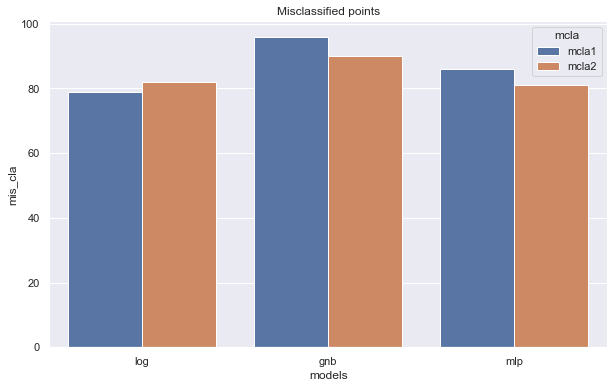

In [29]:
sns.set()
plt.figure(figsize=(10,6))
sns.barplot("models" , "mis_cla",hue="mcla",data=mydata)
plt.title("Misclassified points")
plt.savefig("misclas.png")
plt.show()

**Tweaking the features by manipulating in terms of accuracy score, it is evident from the plot that the log reg performs better in the first instance than the others even when other accuracy scores have a high accurcay score in the second instance, the accuracy score of the log reg at the first instance superceeds others.**

**In the misclassification plots, which indicates the number of misclassified points made by our model, the log reg at the first instance is still the smallest with misclassifications of 79 which seems to be the best**

**In conclusion, we will stick with using the first instance, i.e all the features**

# Model Improvements (Randomized CV)

In [30]:
X = df.iloc[:,1:-1]

features = list(X.columns)
X=df[features]
y=df.iloc[:,-1]

#Splitting the dataset into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [31]:
X_train

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
1078,52,11.3,2.5,0.9,2.3,39.3,0.0,0.2,11.1,0.7,1.0,71.7,1.4,0.8,2.2,0.4,0.8,0.3,0.3
813,78,27.0,10.8,4.1,9.7,42.2,0.7,1.8,36.4,1.9,2.7,72.7,1.2,3.3,4.5,1.3,0.9,0.9,1.8
260,49,11.9,5.3,2.3,5.1,44.6,0.0,0.1,0.0,0.8,1.1,72.2,0.2,0.4,0.6,1.2,0.4,0.0,1.0
927,73,24.5,6.8,2.5,6.2,40.3,0.9,2.6,35.8,0.9,1.4,63.1,1.5,2.9,4.3,1.3,0.6,0.1,1.0
1239,79,25.9,11.4,4.6,9.8,46.5,0.0,0.1,0.0,2.3,3.6,64.5,2.4,3.6,6.0,0.6,0.5,1.3,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,72,19.8,5.8,2.4,5.2,45.4,0.0,0.0,0.0,1.1,1.3,85.9,1.2,1.8,3.0,1.5,0.4,0.1,1.3
727,71,11.2,2.9,1.2,3.1,39.6,0.0,0.1,0.0,0.5,0.7,62.3,0.7,1.4,2.1,0.5,0.4,0.1,0.3
451,80,20.2,5.1,2.0,4.4,46.2,0.0,0.0,0.0,1.0,1.4,69.0,1.5,2.7,4.1,1.0,0.4,0.6,1.7
177,48,5.7,1.1,0.4,1.8,23.8,0.0,0.1,16.7,0.3,0.4,76.5,0.2,0.4,0.6,1.3,0.3,0.0,0.5


In [32]:
logreg = LogisticRegression()
parameters = {
    "C":[0.001,0.1,1.0,0.01,100,10.0],
    "penalty":["none","l2","l1","elasticnet"],
    "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
rand = RandomizedSearchCV(estimator=logreg, param_distributions=parameters,cv=5)

In [33]:
rand.fit(X,y)
rand.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}

In [34]:
logreg = LogisticRegression(penalty = 'l1',C = 0.1,solver = 'liblinear',max_iter=1000)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
logacc = accuracy_score(y_test,y_pred)
print("The acccuracy score is: ",round(logacc,3))

The acccuracy score is:  0.686


In [35]:
#misclssified
log_mis_cla = (X_test.shape[0],(y_test!=y_pred).sum())[1]
print("The misclassified points: ",log_mis_cla)

The misclassified points:  83


In [36]:
gnb = GaussianNB()
parameters = {
    "priors":[[0.3, 0.7], [0.5, 0.5], [0.2, 0.4, 0.4]],
    "var_smoothing":[1e-7,1e-6,1e-5]
}

rand = RandomizedSearchCV(estimator=gnb, param_distributions=parameters,cv=5)

In [37]:
rand.fit(X,y)
rand.best_params_

{'var_smoothing': 1e-07, 'priors': [0.3, 0.7]}

In [38]:
gnb = GaussianNB(var_smoothing = 1e-07,priors = [0.3, 0.7])
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
gnbacc = accuracy_score(y_test,y_pred)
print("The acccuracy score is: ",round(gnbacc,3))

The acccuracy score is:  0.64


In [39]:
#misc
gnb_mis_cla = (X_test.shape[0],(y_test!=y_pred).sum())[1]
print("The misclassified points: ",gnb_mis_cla)

The misclassified points:  95


In [40]:
mlp = MLPClassifier()
parameters = {
    "hidden_layer_sizes":[(10, 50, 20), (20,10,40), (20,50,100)],
    "activation":["relu","logistic"]
}
rand = RandomizedSearchCV(estimator=mlp, param_distributions=parameters,cv=5)

In [41]:
rand.fit(X,y)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(),
                   param_distributions={'activation': ['relu', 'logistic'],
                                        'hidden_layer_sizes': [(10, 50, 20),
                                                               (20, 10, 40),
                                                               (20, 50, 100)]})

In [42]:
rand.best_params_

{'hidden_layer_sizes': (20, 10, 40), 'activation': 'logistic'}

In [43]:
mlp = MLPClassifier(hidden_layer_sizes=(20,50,100),activation = "logistic",
                   random_state = 4, max_iter = 2000)

In [44]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 50, 100),
              max_iter=2000, random_state=4)

In [45]:
y_pred = mlp.predict(X_test)

In [46]:
mlpacc = accuracy_score(y_test,y_pred)
print("The acccuracy score is: ",round(mlpacc,3))

The acccuracy score is:  0.712


In [47]:
#misc
mlp_mis_cla = (X_test.shape[0],(y_test!=y_pred).sum())[1]
print("The misclassified points: ",mlp_mis_cla)

The misclassified points:  76


In [48]:
#Creat a list hold their accuracy score
acc_score3 = []
acc_score3.append(logacc)
acc_score3.append(gnbacc)
acc_score3.append(mlpacc)

In [49]:
#List to hold thier misclassification
mis_clas3 = []
mis_clas3.append(log_mis_cla)
mis_clas3.append(gnb_mis_cla)
mis_clas3.append(mlp_mis_cla)

In [50]:
models = {
    "acc_score":accuracy_scores1 + acc_score3,
    "models":["log",'gnb','mlp',"log",'gnb','mlp'],
    "acc":["acc1","acc1","acc1","tuned","tuned","tuned"],
    "mis_cla": mis_clas1 + mis_clas3,
    "mcla": ["mcla1","mcla1","mcla1","tuned","tuned","tuned"]
}

In [51]:
mydata = pd.DataFrame(models)
mydata

,acc_score,models,acc,mis_cla,mcla
0,0.701000,log,acc1,79,mcla1
1,0.636000,gnb,acc1,96,mcla1
2,0.674000,mlp,acc1,86,mcla1
3,0.685606,log,tuned,83,tuned
4,0.640152,gnb,tuned,95,tuned
5,0.712121,mlp,tuned,76,tuned


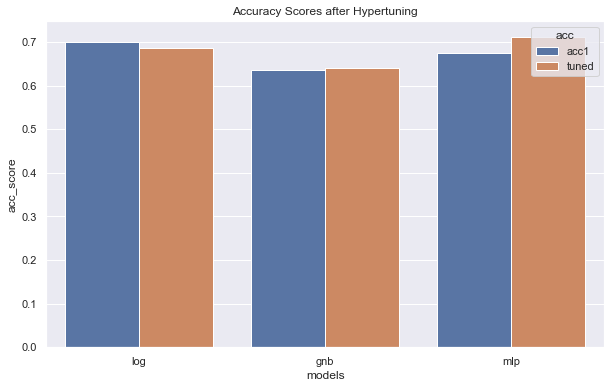

In [52]:
sns.set()
plt.figure(figsize=(10,6))
sns.barplot("models" , "acc_score",hue="acc",data=mydata)
plt.title("Accuracy Scores after Hypertuning")
plt.savefig("acc_score_hypertuned.png")
plt.show()

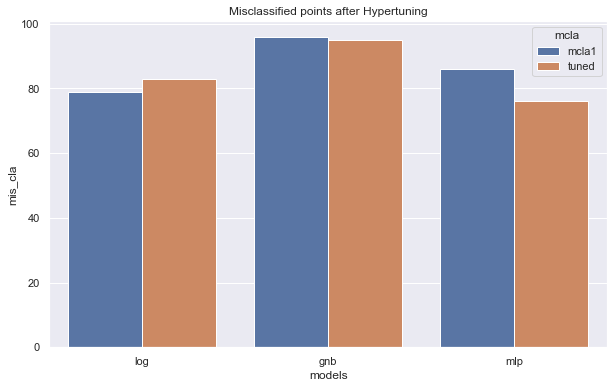

In [53]:
sns.set()
plt.figure(figsize=(10,6))
sns.barplot("models" , "mis_cla",hue="mcla",data=mydata)
plt.title("Misclassified points after Hypertuning")
plt.savefig("misclas_hypertuned.png")
plt.show()

**In conclusion, trying to improve our models worked we made use of Randomised cross validation which made positive impact on the gnb and mlp models, with a reduced mmisclassfied points and increase in its accuracy score. The Logisitic regression worsen when we try to improve it, so we will stick with its initial instance**

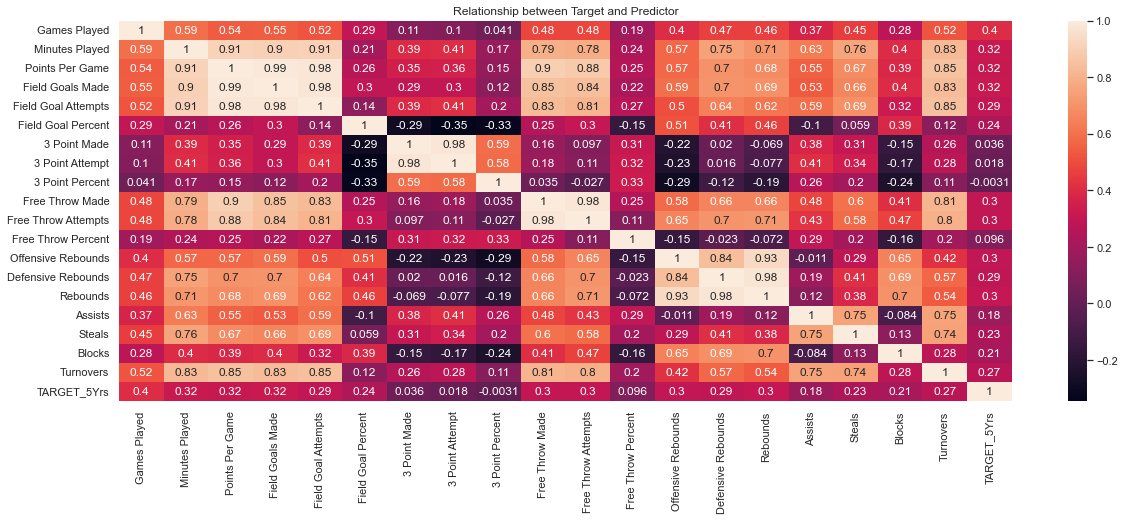

In [54]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot = True)
plt.title("Relationship between Target and Predictor")
plt.savefig("relationship.png")
plt.show()

**From the plot, not all features are positively or negatively correlated to the Target variable, but there is a moderate relationship between the predictor and target variable**

In [55]:
#Data to predict

input_data = [36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3]

In [ ]:
#Predict a single value with the best instances of our model

logreg = LogisticRegression()
gnb = GaussianNB(var_smoothing = 1e-07,priors = [0.3, 0.7])
mlp = MLPClassifier(hidden_layer_sizes=(20,50,100),activation = "logistic",
                   random_state = 4, max_iter = 2000)

#fit values
logreg.fit(X_train,y_train)
gnb.fit(X_train,y_train)
mlp.fit(X_train,y_train)

In [ ]:
print("A single value is: ",logreg.predict([input_data])[0])
print("A single value is: ",gnb.predict([input_data])[0])
print("A single value is: ",mlp.predict([input_data])[0])